<b><font color="blue" size="8"> 👣  premiers pas en SQL</font></b>

Nous avons vus en cours ce qu'est le modèle relationnel et ce qu'est le schéma relationnel.

Nous allons maintenant aborder la pratique : créer, gérer, consulter une base de données.

Pour cela nous utiliserons le langage le plus utilisé : Structured Query Langage, plus communément nommé **SQL**.

Dans ce tout premier TP nous allons créer une base de données ne contenant qu'une seule table.

---

---

<font color=lightseagreen size=6><b>I Création et gestion d'une table</b></font>

---

---

Nom de la table : eleves

Attributs : 
+ id (un identifiant unique servant de clef primaire)
+ nom
+ prénom
+ date_naiss
+ classe
+ nb_heures (nombre d'heures dans son EDT)

✏️ Syntaxe pour créer une table :
<pre>
CREATE TABLE (
  attribut type ,
  attribut type ,
  attribut type
);
</pre>

On peut parfois préceder de :
<pre>
DROP TABLE IF EXISTS table ;
</pre>
ceci afin de supprimer la table si elle existe déjà. 

🖐 **attention** ceci est à manier avec précaution, vous allez détruire une table existante ! Mais c'est pratique dans nos TP : quand vous aurez fait une erreur, vous devrez souvent reconstruire la table, et cette ligne DROP permettra de le faire facilement. Vous pourrez aussi utiliser le menu Cellule -> exécuter tout pour refaire tout le TP jusqu'au point ou vous en étiez.

On peut ajouter des **contraintes**, par exemple, au moins l'un des attributs sera clef primaire.

✏️ La contrainte NOT NULL est utilisée pour indiquer que cet attribut doit avoir une valeur non nulle (champ obligatoire).

✏️ Le type, pour nous, sera : INTEGER, TEXT, REAL ou DATE. Mais il en existe d'autres.

✏️ pour les dates, on précise le format (voir ci-dessous).

✏️Des virgules séparent les attributs, le dernier n'est pas ponctué par la virgule.

Les schéma de notre BDD sera limité à une seule table :

<b><FONT courier new>eleves (<u>id</u> , nom , prenom, date_naiss, classe, nb_heures)</font></b>


Allez, on se lance :


In [1]:
-- les tirets permettent d'insérer des commentaires
DROP TABLE IF EXISTS eleves; -- notez bien ce ; en fin de chaque bloc d'instructions
CREATE TABLE eleves (
    id INTEGER PRIMARY KEY ,  
    nom TEXT NOT NULL ,
    prenom TEXT NOT NULL ,
    date_naiss DATE FORMAT 'dd.mm.yyyy' NOT NULL , 
    classe TEXT NOT NULL ,
    nb_heures INTEGER

); -- notez bien de nouveau ce ;

Nous avons créé une table, **ajoutons des éléments.**

✏️ Pour cela on utilise 
<pre>
INSERT INTO table
(liste des attributs)
VALUES
(... , ... , ...) ,
(... , ... , ...) ,
(... , ... , ...) ;
</pre>

La liste des attributs n'est pas obligatoire mais recommandée.

**Ajoutons 2 élèves :**

In [2]:
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(1, 'BELMONDO', 'Jean-Paul', '09.04.1933', 'TG8', 32),
(2, 'CLOONEY', 'Georges', '06.05.1960', 'TG8', 28);

## les contraintes d'intégrité :

Le SGBD vérifie toujours que tout est correct, et refuse des insertions qui briseraient l'intégrité de la base.

Essayons d'ajouter un 3ème élève avec un **id** déjà utilisé, rompant la contrainte d'unicité de la clef primaire :

In [3]:
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(1, 'Hitchcock', 'Alfred', '13.08.1899', 'TG8', 20);

Error: UNIQUE constraint failed: eleves.id

: 

Le SGBD a fait son travail et nous a empêché de mettre la table en erreur.

Bon, ajoutons quand même Alfred mais essayons d'ommettre sa date de naissance, qu'on va mettte NULL :

In [4]:
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(3, 'Hitchcock',' Alfred', NULL, 'TG2', 20);

Error: NOT NULL constraint failed: eleves.date_naiss

: 

Rien ne lui échappe !!!!

Bon cette fois, on le remet correctement :

In [5]:
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(3, 'Hitchcock', 'Alfred', '13.08.1899', 'TG2', 20);

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 1</font></b> 
 
 **Ajoutez les élèves suivants :**


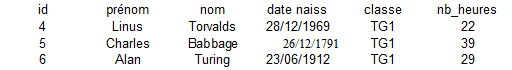

In [6]:
-- A vous

INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(4, 'Torvalds', 'Linus', '28.12.1969', 'TG1', 22),
(5, 'Babbage', 'Charles', '28.12.1791', 'TG1', 39),
(6, 'Turing', 'Alan', '23.06.1912', 'TG1', 29); 


**Vérifions notre table :**   
Nous reviendrons plus tard sur l'instruction `SELECT`. Pour l'instant, il est pratique de connaître la syntaxe suivante, qui permet d'afficher tout le contenu de la table `eleves`.

In [7]:
SELECT *
FROM eleves;

id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1960	TG8	28
3	Hitchcock	Alfred	13.08.1899	TG2	20
4	Torvalds	Linus	28.12.1969	TG1	22
5	Babbage	Charles	28.12.1791	TG1	39
6	Turing	Alan	23.06.1912	TG1	29

# Modifier un enregistrement

Il y a une erreur dans la table : Georges Clooney est bien né le 6 mai, mais en 1961, pas en 1960.

✏️ Rectifions. Pour cela on utilise :
<pre>UPDATE table
SET attribut = nouvelle_valeur
WHERE condition;
</pre>

Il peut y avoir différentes conditions. Nous allons voir deux exemples différents

### 1er exemple

In [8]:
UPDATE eleves
SET date_naiss = '06.05.1961'
WHERE id = 2;

### 2ème exemple

Mais une nouvelle règle s'applique : tous les élèves ayant moins de 30h de cours se voient imposés 2h supplémentaires d'accompagnement :

In [9]:
UPDATE eleves
SET nb_heures = nb_heures + 2
WHERE nb_heures < 30;

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 2</font></b> 
 
 **Modifiez**


Il y a une erreur : tous les élèves de TG1 sont en réalité dans la classe InfoMaster

Faire la modification (vous devez modifier tout en une seule fois)

In [10]:
-- A vous
UPDATE eleves
SET classe =  'infoMaster'
WHERE classe = 'TG1';



In [11]:
SELECT * 
FROM eleves

id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1961	TG8	30
3	Hitchcock	Alfred	13.08.1899	TG2	22
4	Torvalds	Linus	28.12.1969	infoMaster	24
5	Babbage	Charles	28.12.1791	infoMaster	39
6	Turing	Alan	23.06.1912	infoMaster	31

# Supprimer un (ou plusieurs) enregistrement

✏️ La syntaxe est :
<pre>
DELETE 
FROM table
WHERE condition;

In [12]:
DELETE
FROM eleves
WHERE nom = 'BELMONDO';

Bon, allez, on remet Bebel !


In [13]:
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(1, 'BELMONDO', 'Jean-Paul', '09.04.1933', 'TG8', 32);

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 3</font></b> 


**Supprimer un élève, puis le réinscrire dans la base. Vous vérifierez la base à chaque étape.**


In [14]:
-- A vous : supprimer
DELETE
FROM eleves
WHERE nom = 'Turing';


In [15]:
-- A vous : Vérifier la table
SELECT * 
FROM eleves


id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1961	TG8	30
3	Hitchcock	Alfred	13.08.1899	TG2	22
4	Torvalds	Linus	28.12.1969	infoMaster	24
5	Babbage	Charles	28.12.1791	infoMaster	39

In [16]:
-- A vous : réinscrire l'élève
INSERT INTO eleves
(id, nom, prenom, date_naiss, classe, nb_heures)
VALUES
(6, 'Turing', 'Alan', '23.06.1912', 'infoMaster', 31);


In [17]:
-- A vous : Vérifier la table
SELECT * 
FROM eleves



id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1961	TG8	30
3	Hitchcock	Alfred	13.08.1899	TG2	22
4	Torvalds	Linus	28.12.1969	infoMaster	24
5	Babbage	Charles	28.12.1791	infoMaster	39
6	Turing	Alan	23.06.1912	infoMaster	31

## ✍ Mémo Création des tables

<div class="alert alert-danger" role="alert">
    à retenir : 
    <ul><li>les mots clefs <b>DROP TABLE IF EXIST</b> et <b>CREATE TABLE</b> </li>
        <li>Les types : <b>TEXT INTEGER VARCHAR(n)</b></li>
        <li>Les mots clefs <b>PRIMARY KEY</b>
        <li>Les contraintes : <b>NOT NULL</b></li>
    </ul>
</div>



<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>INSERT INTO</b> table <br>
(descripteurs)<br>
    <b>VALUES</b> <br>
( .. , .. , .. )<br>
( .. , .. , .. )<br>

</ul>
</div>



<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>UPDATE</b> table <br>
<b>SET</b> descripteur = valeur<br>
<b>WHERE</b> condition

<b>DELETE FROM</b> table <br>
<b>WHERE</b> condition
</ul>
</div>


---

---


<font color=lightseagreen size=6><b>II Consultation d'une table</b></font>

---

---

## Interrogation : `SELECT`
    
 ✏️   SELECT * FROM <nom_table>
    
Cette requête va nous donner toutes les lignes et toutes les colonnes de la table. 





In [18]:
SELECT * 
FROM eleves ;

id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1961	TG8	30
3	Hitchcock	Alfred	13.08.1899	TG2	22
4	Torvalds	Linus	28.12.1969	infoMaster	24
5	Babbage	Charles	28.12.1791	infoMaster	39
6	Turing	Alan	23.06.1912	infoMaster	31

### projection 

   ✏️ SELECT &lt;nom_attribut>, &lt;nom_attribut> FROM &lt;nom_table>

sélectionne une  ou plusieurs colonnes : 

<table>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background-color:orange"></td>
    </tr>
</table>

In [19]:
SELECT nom, prenom, classe
FROM eleves ;

nom	prenom	classe
BELMONDO	Jean-Paul	TG8
CLOONEY	Georges	TG8
Hitchcock	Alfred	TG2
Torvalds	Linus	infoMaster
Babbage	Charles	infoMaster
Turing	Alan	infoMaster

## Projection : extraire une ou des colonnes

### restriction :

   ✏️ SELECT * FROM &lt;nom_table> WHERE &lt;condition>
    
sélectionne parmi les lignes celles qui valident une certaine condition

    
<table>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
    </tr>
    
</table>
    
les conditions courantes : 
    
    <nom_attribut> [=, >, <, <=, >=] <valeur>
    <nom_attribut> LIKE 
    <chaîne de caractères avec des caractères génériques comme % ou _>

Le caractère `%` représente n'importe quelle chaîne de caractères. On peut l'insérer n'importe où dans la chaîne de caractères de comparaison. 

Par exemple : 
    
✏️  
    SELECT *<br>
    FROM eleve<br>
    WHERE nom LIKE '%a%'
    
sélectionne toutes les lignes où la valeur de l'attribut *nom* est une chaîne de caractères qui contient un *a*. 



## Restriction : extraire une ou des lignes

Exemple : quels sont les élèves de la classe TG8 ? 

In [20]:
SELECT *
FROM eleves
WHERE classe = 'TG8';

id	nom	prenom	date_naiss	classe	nb_heures
1	BELMONDO	Jean-Paul	09.04.1933	TG8	32
2	CLOONEY	Georges	06.05.1961	TG8	30

### Restriction avec projection : 

On va combiner les deux pour obtenir seulement les cases rouges
<table>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:red"></td>
        <td style="border:1px solid; background:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid"></td>
    </tr>
    <tr>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid; background:red"></td>
        <td style="border:1px solid; background:orange"></td>
    </tr>
    <tr>
        <td style="border:1px solid"></td>
        <td style="border:1px solid"></td>
        <td style="border:1px solid; background:orange"></td>
        <td style="border:1px solid"></td>
    </tr>
    
</table>



Exemple : quels sont les prénoms des élèves qui ne sont pas en TG8 ?

In [21]:
SELECT nom, prenom -- choix des colonnes
FROM eleves
WHERE classe <> 'TG8' ; -- choix des lignes

nom	prenom
Hitchcock	Alfred
Torvalds	Linus
Babbage	Charles
Turing	Alan

In [22]:
-- autre syntaxe équivalente :
SELECT nom, prenom
FROM eleves
WHERE classe != 'TG8';

nom	prenom
Hitchcock	Alfred
Torvalds	Linus
Babbage	Charles
Turing	Alan

In [23]:
SELECT nom, prenom
FROM eleves
WHERE id = '1';

nom	prenom
BELMONDO	Jean-Paul

### ✏️ Les conditions courantes :

+ = ou != (noté aussi <>)
+ < &nbsp;&nbsp; >  &nbsp;&nbsp; <= &nbsp;&nbsp;  >= 
+ LIKE
+ is (nous verrons plus tard le **is**)

In [24]:
SELECT nom, prenom
FROM eleves
WHERE nom LIKE 'b%' ; -- tous les nom commençant par B ou b 

nom	prenom
BELMONDO	Jean-Paul
Babbage	Charles

In [25]:
SELECT nom, prenom
FROM eleves
WHERE nom LIKE '%o%' ; -- tout les nom contenant un o ou un O

nom	prenom
BELMONDO	Jean-Paul
CLOONEY	Georges
Hitchcock	Alfred
Torvalds	Linus

In [27]:
SELECT nom, prenom
FROM eleves
WHERE nb_heures >= 30;

nom	prenom
BELMONDO	Jean-Paul
CLOONEY	Georges
Babbage	Charles
Turing	Alan

In [28]:
SELECT nom, prenom
FROM eleves
WHERE nb_heures <> 30;

nom	prenom
BELMONDO	Jean-Paul
Hitchcock	Alfred
Torvalds	Linus
Babbage	Charles
Turing	Alan

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 4</font></b>   
   
 Ecrire la requête qui permet d'afficher le nom, la classe et le nombre d'heures des élèves qui ont moins de 25 heures dans leur emploi du temps.

In [29]:
SELECT nom, classe, nb_heures
FROM eleves
WHERE nb_heures < 25;

nom	classe	nb_heures
Hitchcock	TG2	22
Torvalds	infoMaster	24

## ✏️ Faire des calculs, afficher de nouvelles colonnes

In [30]:
SELECT count(*)
FROM eleves;

count(*)
6

Cela nous donne le nombre d'élèves de la table `eleves`

In [31]:
SELECT MIN(nb_heures)
FROM eleves;

MIN(nb_heures)
22

In [32]:
SELECT MIN(nb_heures), MAX(nb_heures), AVG(nb_heures)
FROM eleves;

MIN(nb_heures)	MAX(nb_heures)	AVG(nb_heures)
22	39	29.666666666666668

### ✏️ renommer les colonnes

L'affichage n'est pas très joli ! Améliorons avec **AS** qui permet de renommer une colonne :

In [33]:
SELECT MIN(nb_heures) AS nombre_h_minimal, MAX(nb_heures) AS nombre_h_maximal, AVG(nb_heures) AS nombre_h_moyen
FROM eleves;

nombre_h_minimal	nombre_h_maximal	nombre_h_moyen
22	39	29.666666666666668

In [34]:
-- des calcul plus complexes :
SELECT nom, prenom, nb_heures+2 AS nb_heure_plus_2
FROM eleves;

nom	prenom	nb_heure_plus_2
BELMONDO	Jean-Paul	34
CLOONEY	Georges	32
Hitchcock	Alfred	24
Torvalds	Linus	26
Babbage	Charles	41
Turing	Alan	33

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 5</font></b>   
   
   Ecrire la requête qui affiche le nombre moyen d'heures des élèves en infoMaster

In [35]:
SELECT AVG(nb_heures)
FROM eleves
where classe = 'infoMaster'

AVG(nb_heures)
31.333333333333332

## ✏️ Trier

In [36]:
SELECT nom, prenom, nb_heures
FROM eleves
ORDER BY nb_heures; -- tri croissant par défaut

nom	prenom	nb_heures
Hitchcock	Alfred	22
Torvalds	Linus	24
CLOONEY	Georges	30
Turing	Alan	31
BELMONDO	Jean-Paul	32
Babbage	Charles	39

In [37]:
SELECT nom, prenom, nb_heures
FROM eleves
ORDER BY nb_heures DESC ; -- tri décroissant

nom	prenom	nb_heures
Babbage	Charles	39
BELMONDO	Jean-Paul	32
Turing	Alan	31
CLOONEY	Georges	30
Torvalds	Linus	24
Hitchcock	Alfred	22

Le tri de chaînes de caractères se fait par ordre alphabétique.

 <b><font color="grey" size=6>⚙ </font><font  color="grey" size=4> A faire vous même 6</font></b>   
   
 Ecrire la requête qui permet d'afficher les noms, et dates de naissances, par ordre alphabétique, des élèves nés au 20ème siècle.

In [38]:
SELECT nom, date_naiss
FROM eleves
WHERE date_naiss LIKE '%.%.19%'
ORDER BY nom ; 

nom	date_naiss
BELMONDO	09.04.1933
CLOONEY	06.05.1961
Torvalds	28.12.1969
Turing	23.06.1912

## ✍ Mémo consulter


<div class="alert alert-danger" role="alert">
    à retenir : <br>
<b>SELECT</b> * (ou 
    <b>SELECT</b> liste de descripteurs séparés par des <b>,</b>) <br>
<b>FROM</b> table<br>
<b>WHERE</b> condition
</div>


<div class="alert alert-danger" role="alert">
Les opérateur de comparaison courrants :<br>
<ul>
<li>= ou != (noté aussi &lt;>)</li>
<li>&lt;> &lt;= >= </li>
<li>LIKE</li>
    <li>is (nous verrons plus tard le <b>is</b>)</li></ul>
</div>

<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre d'enregistrement de la table : <b>count(*)<br>
<b>SELECT</b> count(*)<br>
    <b>FROM</b> table<br>
<b>WHERE</b> condition
</div>


<div class="alert alert-danger" role="alert">
    à retenir : compter le nombre de valeur distincte d'un descripteur : <b>count(DISTINCT descripteur)<br>
<b>SELECT</b> count(DISTINCT descripteur)<br>
    <b>FROM</b> table<br>
</div>


<div class="alert alert-danger" role="alert">
    à retenir : pour trier (croissant par défaut, ou décroissant avec DESC)<br>
<b>SELECT</b> *<br>
<b>FROM</b> table<br>
    <b>ORDER BY</b> descripteur <b>&lt;DESC></b>
</div>


<div class="alert alert-danger" role="alert">
    à retenir : MIN MAX et AVG <br>
<b>SELECT</b> MIN(attribut)<br>
    <b>FROM</b> table<br>
</div>


<center>

---

**Auteurs :**  Jean-Louis Thirot et Mireille Coilhac

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.